In [3]:
#import modules
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

#Set import filename and filepath
filename = 'default of credit card clients.csv'
filepath = os.path.join(r'C:\Users\rlangran\Desktop\UT Data Analytics\Section 5',filename)

#Set export filename and filepath
expname = 'results.xlsx'
exppath = os.path.join(r'C:\Users\rlangran\Desktop\UT Data Analytics\Section 5',expname)
                        
#Import dataset
df = pd.read_csv(filepath, header =1)

#change name of default field
df.rename(columns={'default payment next month':'DEFAULT_IND'}, inplace=True)

#Inspect general characteristics of the dataset
print(df.head())
print(df.describe())
print(df.info())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  DEFAULT_IND  
0         0         0         0        

In [4]:
#Data reduction
#Consolidate the other education indicators into one
#“0, 4, 5, 6” all other school
#1 - graduate school
#2 - university
#3 - high school
#4 - others
df['EDUCATION'] = df['EDUCATION'].replace(0,4).replace(5,4).replace(6,4)

#Create a single late payment indicator
#“-2” no payment required / “-1” paid in full / “0” partial payment / “1,2,3,…” number of months payment is past due
#PAY_0	PAY_2	PAY_3	PAY_4	PAY_5	PAY_6
#"1" indicator = has had a late payment / "0" indicator = has not had a late payment
Nme1 = []
for row in df.itertuples():
    if row.PAY_0 > 0 or row.PAY_2 > 0 or row.PAY_3 > 0 or row.PAY_4 > 0 or row.PAY_5 > 0 or row.PAY_6 > 0:
        lpi = 1
    else:
        lpi = 0
    
    Nme1.append(lpi)
    
    
df['LATE_PMT'] = Nme1

#Data discretizing
#Age: 21-79 -4 bins 0-29,30-45,46-59,60-79
bins = [0, 30, 45, 60, 100]
labels = ['1','2','3','4']
df['AGE_BIN'] = pd.cut(df['AGE'], bins=bins, labels=labels)

#Calculated fields
#Average Balance and Average Payment Amt

df['AVG_BAL'] = df.iloc[:,12:18].mean(axis=1)
df['AVG_PMT'] = df.iloc[:,18:24].mean(axis=1) 

df['DIFF'] = df['AVG_BAL'] - df['AVG_PMT']

#Ratio of Avg Pmt to Avg Bal
df['PMT_RTO'] = df['AVG_PMT'] / df['AVG_BAL']

#Round decimals for new fields
df['PMT_RTO'] = df['PMT_RTO'].apply(lambda x: round(x,3))
df['DIFF'] = df['DIFF'].apply(lambda x: round(x,0))

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_IND', 'LATE_PMT', 'AGE_BIN', 'AVG_BAL', 'AVG_PMT', 'DIFF',
       'PMT_RTO', 'EDU', 'MAR', 'GEN', 'AVB_BIN', 'AVP_BIN'],
      dtype='object')


(array([ 1432., 20144.,  4659.,  3765.]),
 array([-1.,  0.,  1.,  2.,  3.]),
 <a list of 4 Patch objects>)

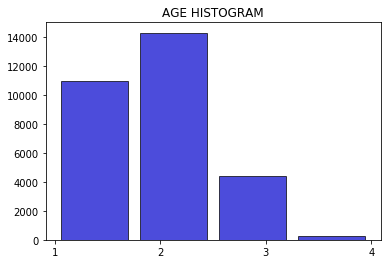

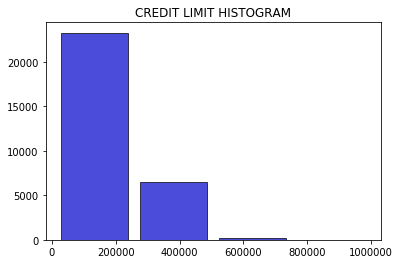

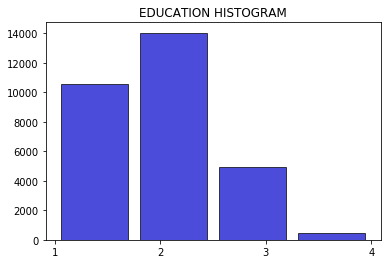

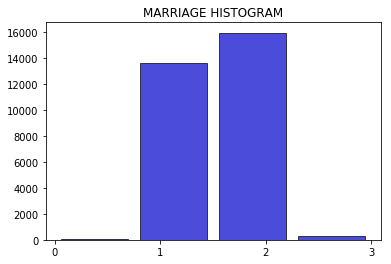

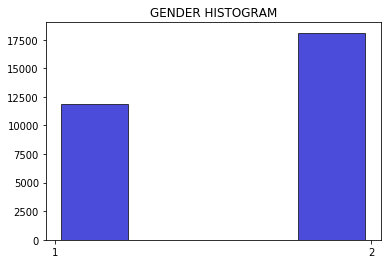

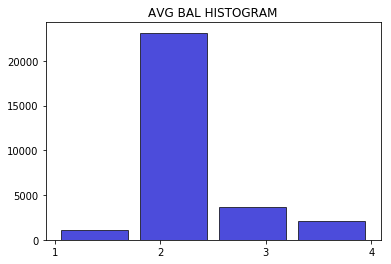

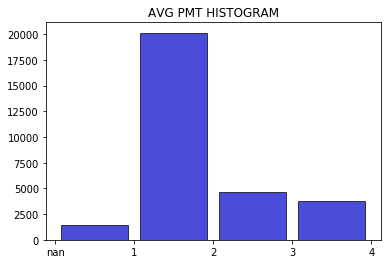

In [6]:
## EXPLORATORY DATA ANALYSIS XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
header = df.dtypes.index
print(header)

#plt.hist(df['LIMIT_BAL'], bins=4)
#plt.show()
#histograms
fig1, ax1 = plt.subplots()
ax1.set_title('AGE HISTOGRAM')
ax1.hist(df['AGE_BIN'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")
fig1, ax2 = plt.subplots()
ax2.set_title('CREDIT LIMIT HISTOGRAM')
ax2.hist(df['LIMIT_BAL'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")
fig1, ax3 = plt.subplots()
ax3.set_title('EDUCATION HISTOGRAM')

#Set education to string
df['EDU'] = df['EDUCATION'].astype(str)
ax3.hist(df['EDU'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

fig1, ax4 = plt.subplots()
ax4.set_title('MARRIAGE HISTOGRAM')

#Set education to string
df['MAR'] = df['MARRIAGE'].astype(str)
ax4.hist(df['MAR'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

fig1, ax5 = plt.subplots()
ax5.set_title('GENDER HISTOGRAM')

#Set gender to string
#1 - male / 2 - female
df['GEN'] = df['SEX'].astype(str)
ax5.hist(df['GEN'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

#Histogram for three calc fields
#AVG_BAL:
bins = [-60000, 0, 75000, 150000, 1000000]
df['AVB_BIN'] = pd.cut(df['AVG_BAL'], bins=bins, labels=labels)

fig1, ax6 = plt.subplots()
ax6.set_title('AVG BAL HISTOGRAM')
ax6.hist(df['AVB_BIN'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

#AVG_PMT:
bins = [0, 5000, 10000, 20000, 700000]
labels = ['1','2','3','4']
df['AVP_BIN'] = pd.cut(df['AVG_PMT'], bins=bins, labels=labels)
fig1, ax7 = plt.subplots()
ax7.set_title('AVG PMT HISTOGRAM')
ax7.hist(df['AVP_BIN'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

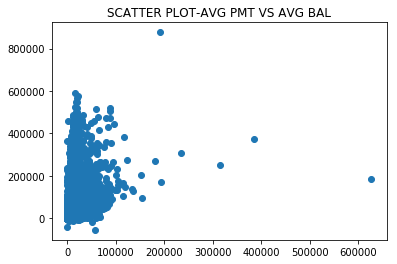

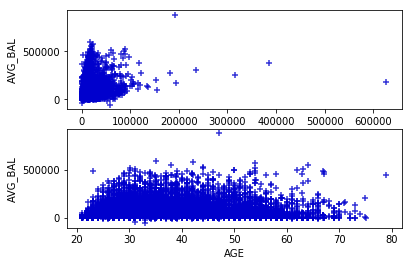

In [7]:
#scatter plots
x = df['AVG_PMT']
y = df['AVG_BAL']
fig1, ax9 = plt.subplots()
ax9.set_title('SCATTER PLOT-AVG PMT VS AVG BAL')
ax9.scatter(x,y)

fig = plt.figure()
ax11 = fig.add_subplot(211)
ax21 = fig.add_subplot(212)

sns.regplot(x=df['AVG_PMT'], y=df['AVG_BAL'], data=df, fit_reg=False, color='mediumblue',marker="+",x_jitter=.05,ax=ax11)
g = sns.regplot(x=df['AGE'], y=df['AVG_BAL'], data=df, fit_reg=False, color='mediumblue',marker="+",x_jitter=.05,ax=ax21)



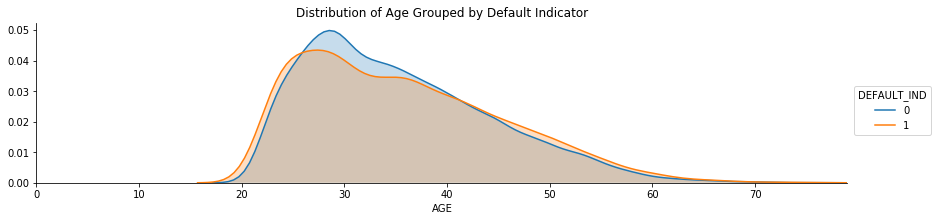

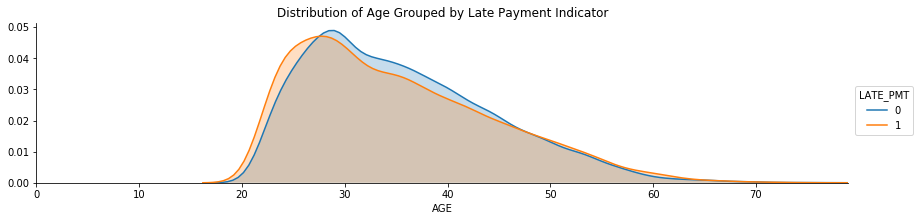

In [8]:
#Kernel density estimation plots
fig = sns.FacetGrid(df, hue='DEFAULT_IND', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Default Indicator')
fig.add_legend()

fig = sns.FacetGrid(df, hue='LATE_PMT', aspect=4)
fig.map(sns.kdeplot, 'AGE', shade=True)
oldest = df['AGE'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Late Payment Indicator')
fig.add_legend()

                 ID      LIMIT_BAL          SEX    EDUCATION     MARRIAGE  \
count   2979.000000    2979.000000  2979.000000  2979.000000  2979.000000   
mean   15827.654246  233994.629070     1.652568     1.663310     1.494126   
std     8813.043273  125953.001023     0.476234     0.766425     0.513958   
min       34.000000   10000.000000     1.000000     1.000000     0.000000   
25%     8231.000000  150000.000000     1.000000     1.000000     1.000000   
50%    16047.000000  210000.000000     2.000000     1.000000     1.000000   
75%    23545.000000  310000.000000     2.000000     2.000000     2.000000   
max    29986.000000  800000.000000     2.000000     4.000000     3.000000   

               AGE        PAY_0        PAY_2        PAY_3        PAY_4  ...  \
count  2979.000000  2979.000000  2979.000000  2979.000000  2979.000000  ...   
mean     36.917422    -1.442095    -1.430010    -1.455186    -1.434710  ...   
std       8.738298     0.569177     0.554655     0.549365     0.58468

(array([2504.,  475.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

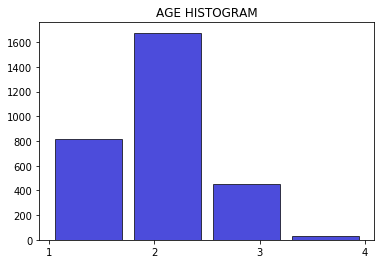

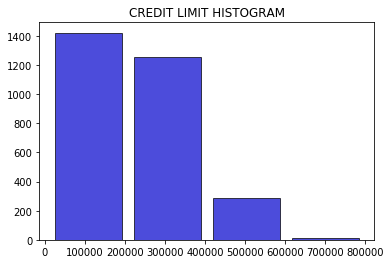

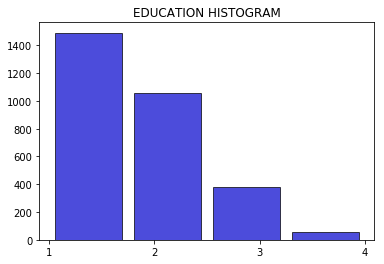

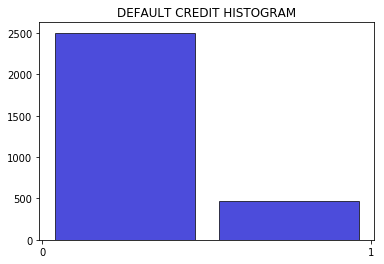

In [15]:
#Restrict dataset based on the following parameters:
#DIFF (difference bet avg_bal and avg_pmt is 0 or less AND late_pmt = 0)
#problem with ID 28717 paid 3.764M but balance was 1.093M
newdf = df[(df['DIFF']<=0) & (df['LATE_PMT']==0)]

#ignores "A value is trying to be set on a copy of a slice from a DataFrame." warning
pd.options.mode.chained_assignment = None  # default='warn'

fig2, ax1 = plt.subplots()
ax1.set_title('AGE HISTOGRAM')
#AGE BIN:
#1 - 20-30
#2 - 30-45
#3 - 45-60
#4 - 60-80
ax1.hist(newdf['AGE_BIN'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")
fig2, ax2 = plt.subplots()
ax2.set_title('CREDIT LIMIT HISTOGRAM')
ax2.hist(newdf['LIMIT_BAL'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")
fig2, ax3 = plt.subplots()
ax3.set_title('EDUCATION HISTOGRAM')
ax3.hist(newdf['EDU'], bins=4, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

#default indicator - found over 90% were not in default!
#age 30-45
#diff 0 or less
#late_pmt 0
print(newdf.describe())
fig2, ax1 = plt.subplots()
newdf['D_IND'] = df['DEFAULT_IND'].astype(str)
ax1.set_title('DEFAULT CREDIT HISTOGRAM')
ax1.hist(newdf['D_IND'], bins=2, color='mediumblue',alpha=0.7, rwidth=0.85,edgecolor="k")

In [16]:
#correlation and covariance matrices
#Use subset for correlation and covariance
dfanl = (df[['SEX','EDUCATION','MARRIAGE','AGE','DIFF','AVG_BAL','LATE_PMT','DEFAULT_IND']])
corrMat = dfanl.corr()
print(corrMat)

covMat = dfanl.cov()
print(covMat)

                  SEX  EDUCATION  MARRIAGE       AGE      DIFF   AVG_BAL  \
SEX          1.000000   0.013627 -0.031389 -0.090874 -0.026272 -0.025920   
EDUCATION    0.013627   1.000000 -0.149134  0.182434  0.013677  0.001677   
MARRIAGE    -0.031389  -0.149134  1.000000 -0.414170 -0.023734 -0.024507   
AGE         -0.090874   0.182434 -0.414170  1.000000  0.050634  0.054981   
DIFF        -0.026272   0.013677 -0.023734  0.050634  1.000000  0.987555   
AVG_BAL     -0.025920   0.001677 -0.024507  0.054981  0.987555  1.000000   
LATE_PMT    -0.027708   0.035672  0.000981 -0.020183 -0.036229 -0.057455   
DEFAULT_IND -0.039961   0.033842 -0.024339  0.013890  0.003879 -0.012691   

             LATE_PMT  DEFAULT_IND  
SEX         -0.027708    -0.039961  
EDUCATION    0.035672     0.033842  
MARRIAGE     0.000981    -0.024339  
AGE         -0.020183     0.013890  
DIFF        -0.036229     0.003879  
AVG_BAL     -0.057455    -0.012691  
LATE_PMT     1.000000     0.352858  
DEFAULT_IND  0.3528